In [1]:
using LinearAlgebra
using Plots
using Statistics

In [2]:
# Set up parameters
beta = exp(-0.014)
# sigma c
sc = [0.477 0.0]
# sigma z
sz = [0.011 0.025]
# trend
nu = 0.0
# nu = 0.484
# risk aversion
gamma = 2
# gamma = 10
# discount
delta = 0.002
lambda = exp(-delta)

0.9980019986673331

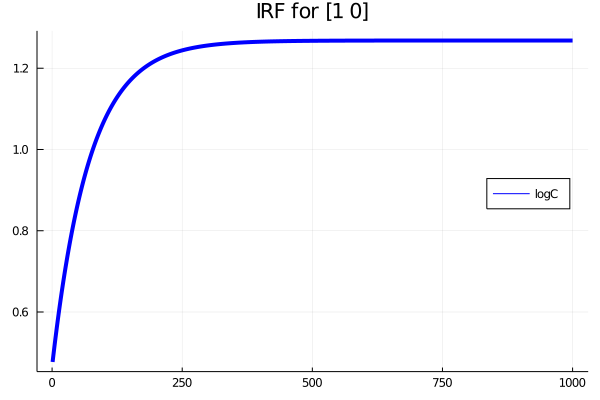

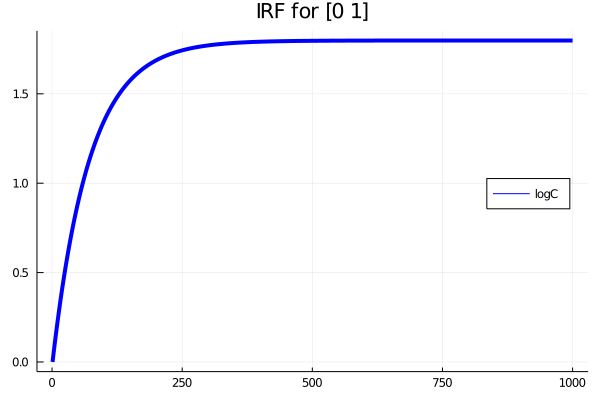

In [10]:
# Recursively run the system
# For simplicity, Z_0 and log C_0 both zero

# impulse response horizon
n = 1000

# First shock
W1 = [1 0]
# Secon shock
W2 = [0 1]

# Shocks list
Ws = [W1, W2]
# println(Ws)

# Initialize plot
plt = []

# IRF for each shock type
for w in Ws
    # initialize
    C = zeros(n)
    Z = zeros(n)
    # Shock the system (note that shock hits both C and Z)
    C[1] = nu + (sc*w')[1]
    Z[1] = (sz*w')[1]
    # Iterate forward to see how shock effects time series, assuming no other shocks
    for i in 2:n
        C[i] = C[i-1] + nu + Z[i-1]
        Z[i] = beta*Z[i-1]
    end
    # Plot results
    plt = plot(1:n, C, label = string("logC"), legend = :right, linecolor="blue", linewidth = 4, 
            title = string("IRF for ", w))
    display(plt)
    savefig(string("IRFfor", w, "raw.png"))
end

In [4]:
# sigma f
sf = 1/(1-beta)*sz + sc
println("sf: ", sf)

# one possible sigma perp
sp = [1 -sf[1]/sf[2]]
println("sp: ", sp)

# spot check for zero
sf*sp'

# build Omega inverse
Omi = [1/norm(sf)*sf; 1/norm(sp)*sp]
println(Omi)

# Find Omega
Om = inv(Omi)

# Note that a correctly signed choice for sp makes Om = Omi

sf: [1.2682271190056964 1.7982434522856736]
sp: [1.0 -0.7052588554645951]
[0.5763430707028117 0.8172078467885964; 0.8172078467885964 -0.5763430707028117]


2×2 Array{Float64,2}:
 0.576343   0.817208
 0.817208  -0.576343

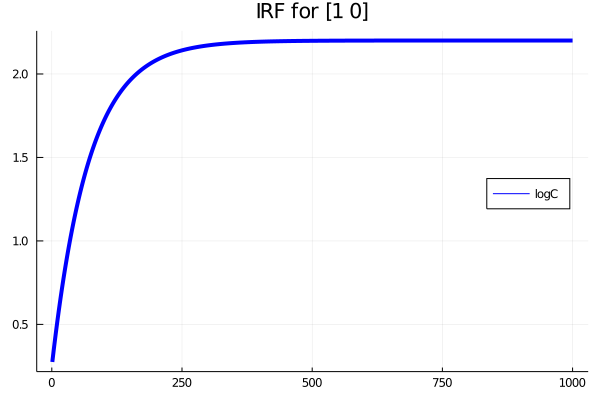

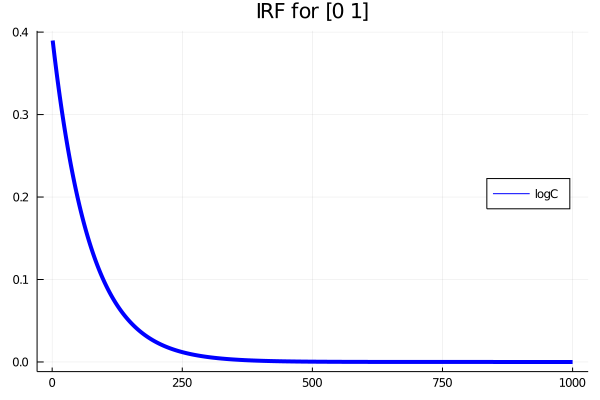

In [6]:
# Recursively run the system
# For simplicity, Z_0 and log C_0 both zero

# impulse response horizon
n = 1000

# Pure permanent shock
Wp = [1 0] #./ (sqrt(sf*sf')[1])
# Pure transitory shock
Wt = [0 1] #./ (sqrt(sf*sf')[1])

# Shocks list
Ws = [Wp, Wt]
# println(Ws)

# Initialize plot
plt = []

# IRF for each shock type
for w in Ws
    # initialize
    C = zeros(n)
    Z = zeros(n)
    # Shock the system (note that shock hits both C and Z)
    C[1] = nu + (sc*Om*w')[1]
    Z[1] = (sz*Om*w')[1]
    # Iterate forward to see how shock effects time series, assuming no other shocks
    for i in 2:n
        C[i] = C[i-1] + nu + Z[i-1]
        Z[i] = beta*Z[i-1]
    end
    # Plot results
    plt = plot(1:n, C, label = string("logC"), legend = :right, linecolor="blue", linewidth = 4, 
            title = string("IRF for ", w))
    display(plt)
    savefig(string("IRFfor", w, "trans.png"))
end




In [13]:

for g in [1, 2, 4, 8, 10]
    gamma = g
    # Risk prices
    ss = -(gamma*sc + (gamma - 1)*lambda/(1-lambda*beta)*sz)
    # make sigma_s into negative sigma_s
    ss = ss*(-1)

    # Print results
#     println("g = ", g, " ss: ", ss)
    println("g = ", g, " perm: ", (ss*Om*Wp')[1])
    println("g = ", g, " trans: ", (ss*Om*Wt')[1])
    println()
end

g = 1 perm: 0.27491564472524116
g = 1 trans: 0.3898081429181604

g = 2 perm: 2.233005372520884
g = 2 trans: 0.43887592427251343

g = 4 perm: 6.149184828112168
g = 4 trans: 0.5370114869812189

g = 8 perm: 13.981543739294738
g = 8 trans: 0.7332826123986298

g = 10 perm: 17.897723194886023
g = 10 trans: 0.8314181751073363

